<a href="https://colab.research.google.com/github/joao-pires/data_science/blob/master/Analisando_dados_violencia_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência em São Paulo

É fato que a violência assusta e amedronta a vida dos paulistanos. Não somente em São Paulo, mas em todo o Brasil. 

Afinal, o que acontece nas ruas da cidade? Vários fatores podem tentar explicar, ao menos em parte, o que ocorre.

Para isso, o governo do estado de São Paulo disponibiliza no [portal de Segurança Pública](https://www.ssp.sp.gov.br/) diversos dados estatísticos sobre a violência no estado. 

# Obtenção dos Dados

Os dados foram obtidos diretamente do porta de Segurança Publica do Estado de SP. 

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) além de informações complementares da produtividade Policial.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente neste [link](https://raw.githubusercontent.com/joao-pires/data_science/master/datasets/crimes_sp.csv).

## Importando os dados

In [0]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/joao-pires/data_science/master/datasets/crimes_sp.csv')

# Análise Inicial dos Dados

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,ano,mes,homicidio_doloso,vitimos_homicio_doloso,homicidio_doloso_acidente_transito,vitimas_homicidio_doloso_acidente_transito,homicidio_culposo_acidente_transito,homicidio_culposo_outros,tentativa_homicidio,lesao_corporal_doloso,lesao_corporal_culposa_acidente_transito,lesao_corporal_culposa_outros,latrocinio,vitimas_latrocinio,estupro,roubo_outros,roubo_veiculo,roubo_banco,roubo_carga,furto_outros,furto_veiculo,ocorrencias_porte_entorpecentes,ocorrencias_trafico_entorpecentes,ocorrencia_apreensao_entorpecentes,ocorrencia_porte_ilegal_armas,arma_fogo_apreendias,flagrantes_lavrados,infratores_apreendidos_flagrante,infratores_apreendido_mandato,pessoas_presas_flagrante,pessoas_presas_mandato,prisões_efetuadas,veiculos_recuperados,inqueritos_policiais_instaurados
0,2009,Jan,103,107,0,0,52,6,98,3157,1735,87,11,11,109,10187,3109,12,375,14216,3313,184,479,25,156,488,1676,184,33,2137,615,2016,2534,7334
1,2009,Fev,90,96,0,0,55,6,106,3159,1769,94,6,6,87,9960,3064,8,373,12086,3243,191,371,19,176,559,1758,155,21,2244,525,2011,2568,7236
2,2009,Mar,112,120,0,0,64,6,97,3622,2209,102,10,10,127,11005,3496,15,418,13847,3983,205,437,25,150,679,1888,179,37,2419,640,2183,2845,8113
3,2009,Abr,113,120,0,0,58,3,107,3124,2085,90,13,13,85,10379,3118,18,412,13990,3793,223,429,21,160,619,1832,150,18,2358,669,2137,2746,7997
4,2009,Mai,125,125,0,0,54,8,106,3109,2139,78,8,8,115,10865,3173,9,392,16061,3939,201,476,18,190,579,1947,136,27,2504,644,2253,2902,8644


### Qual o tamanho do nosso dataframe?

Vamos prosseguir analisando o tamanho do nosso dataframe, quantas variáveis e entradas possuem.

In [4]:
# identificar o volume de dados do dataframe
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))


Variáveis:	 34
Entradas:	 132



### Qual o nome e tipo das colunas (entradas)? 

Agora vamos analisar qual o nome das colunas e os tipos de cada uma delas.

In [5]:
# Imprimir o nome das colunas
df.columns

Index(['ano', 'mes', 'homicidio_doloso', 'vitimos_homicio_doloso',
       'homicidio_doloso_acidente_transito',
       'vitimas_homicidio_doloso_acidente_transito',
       'homicidio_culposo_acidente_transito', 'homicidio_culposo_outros',
       'tentativa_homicidio', 'lesao_corporal_doloso',
       'lesao_corporal_culposa_acidente_transito',
       'lesao_corporal_culposa_outros', 'latrocinio', 'vitimas_latrocinio',
       'estupro', 'roubo_outros', 'roubo_veiculo', 'roubo_banco',
       'roubo_carga', 'furto_outros', 'furto_veiculo',
       'ocorrencias_porte_entorpecentes', 'ocorrencias_trafico_entorpecentes',
       'ocorrencia_apreensao_entorpecentes', 'ocorrencia_porte_ilegal_armas',
       'arma_fogo_apreendias', 'flagrantes_lavrados',
       'infratores_apreendidos_flagrante', 'infratores_apreendido_mandato',
       'pessoas_presas_flagrante', 'pessoas_presas_mandato',
       'prisões_efetuadas', 'veiculos_recuperados',
       'inqueritos_policiais_instaurados'],
      dtype='o

In [6]:
# Imprimir os tipos das colunas
df.dtypes

ano                                            int64
mes                                           object
homicidio_doloso                               int64
vitimos_homicio_doloso                         int64
homicidio_doloso_acidente_transito             int64
vitimas_homicidio_doloso_acidente_transito     int64
homicidio_culposo_acidente_transito            int64
homicidio_culposo_outros                       int64
tentativa_homicidio                            int64
lesao_corporal_doloso                          int64
lesao_corporal_culposa_acidente_transito       int64
lesao_corporal_culposa_outros                  int64
latrocinio                                     int64
vitimas_latrocinio                             int64
estupro                                        int64
roubo_outros                                   int64
roubo_veiculo                                  int64
roubo_banco                                    int64
roubo_carga                                   

### Existem valores ausentes? 

É importante sabermos logo no início se o nosso *dataset* possuem valores ausentes e se irão impactar em nossas análises. 

In [7]:
df.isnull().sum()

ano                                           0
mes                                           0
homicidio_doloso                              0
vitimos_homicio_doloso                        0
homicidio_doloso_acidente_transito            0
vitimas_homicidio_doloso_acidente_transito    0
homicidio_culposo_acidente_transito           0
homicidio_culposo_outros                      0
tentativa_homicidio                           0
lesao_corporal_doloso                         0
lesao_corporal_culposa_acidente_transito      0
lesao_corporal_culposa_outros                 0
latrocinio                                    0
vitimas_latrocinio                            0
estupro                                       0
roubo_outros                                  0
roubo_veiculo                                 0
roubo_banco                                   0
roubo_carga                                   0
furto_outros                                  0
furto_veiculo                           

Nosso *dataset* não possuem valores nulos, podemos então prosseguir com nossa análise sem realizar alguma correção. 

# Informações Estatísticas da Violência de São Paulo



Primeiramente vamos realizar um resumo estatístico utilizando o método `describe()`.  

In [8]:
# resumo estatistico
df.describe().astype('int')

,ano,homicidio_doloso,vitimos_homicio_doloso,homicidio_doloso_acidente_transito,vitimas_homicidio_doloso_acidente_transito,homicidio_culposo_acidente_transito,homicidio_culposo_outros,tentativa_homicidio,lesao_corporal_doloso,lesao_corporal_culposa_acidente_transito,lesao_corporal_culposa_outros,latrocinio,vitimas_latrocinio,estupro,roubo_outros,roubo_veiculo,roubo_banco,roubo_carga,furto_outros,furto_veiculo,ocorrencias_porte_entorpecentes,ocorrencias_trafico_entorpecentes,ocorrencia_apreensao_entorpecentes,ocorrencia_porte_ilegal_armas,arma_fogo_apreendias,flagrantes_lavrados,infratores_apreendidos_flagrante,infratores_apreendido_mandato,pessoas_presas_flagrante,pessoas_presas_mandato,prisões_efetuadas,veiculos_recuperados,inqueritos_policiais_instaurados
count,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
mean,2014,83,88,0,1,43,4,91,2862,1779,102,8,8,205,11274,3123,7,395,16045,3626,234,613,31,118,395,2313,272,32,2813,861,2599,2730,8690
std,3,23,26,1,1,13,4,25,487,455,30,3,3,44,1718,754,5,71,1772,463,221,127,13,22,110,374,83,22,381,272,413,518,1067
min,2009,40,42,0,0,21,0,46,2053,985,50,1,1,64,8380,1525,0,257,12086,2359,84,371,11,74,178,1589,122,3,2032,433,1785,1623,6318
25%,2011,63,66,0,0,32,2,70,2454,1321,80,6,6,183,9772,2673,3,348,15002,3336,124,504,21,104,307,2056,195,17,2513,644,2203,2358,7955
50%,2014,84,89,0,0,42,3,87,2755,1876,94,9,9,205,11381,3092,7,387,15817,3641,157,609,29,113,402,2356,269,27,2828,784,2641,2753,8507
75%,2017,98,104,2,2,52,5,107,3201,2184,118,11,12,229,12653,3611,10,445,17032,3943,225,710,39,135,468,2545,339,45,3062,1078,2920,3172,9265
max,2019,156,176,8,11,82,33,193,4283,2609,215,17,17,329,14927,5082,24,655,23693,4587,1399,945,73,190,679,3217,504,131,3835,1501,3496,3669,11963


### Média de Roubo/Furto de Veículos

Vamos calcular as médias das colunas `roubo_veiculo`, `furto_veiculo`, `veiculos_recuperados`.

In [9]:
# media da coluna roubo_veiculo
media_roubo_veiculo = df.roubo_veiculo.mean()
print("A média de roubo de veículos por mês é:\t {:.2f}".format(media_roubo_veiculo))

# media da coluna furto_veiculo
media_furto_veiculo = df.furto_veiculo.mean()
print("A média de furto de veículos por mês é:\t {:.2f}".format(media_furto_veiculo))

A média de roubo de veículos por mês é:	 3123.91
A média de furto de veículos por mês é:	 3626.27


In [10]:
# media da coluna veiculos_recuperados
media_veiculos_recuperados = df.veiculos_recuperados.mean()
print("A média de veículos recuperados por mês é:\t {:.2f}".format(media_veiculos_recuperados))

A média de veículos recuperados por mês é:	 2730.55


### Porcentagem de veículos recuperados

Com as médias coletadas é possível calcular a porcentagem de veículos recuperados em relação aos veiculos roubados + veiculos furtados.

In [11]:
# 
calc = (media_veiculos_recuperados / (media_roubo_veiculo + media_furto_veiculo))
print("Cerda de {:.2%} dos veiculos roubados, são recuperados".format(calc))

Cerda de 40.45% dos veiculos roubados, são recuperados


### Análise de Homicidios Dolosos

Vamos utilizar a coluna `homicidio_doloso` e encontrar o máximo e minímo de casos por mês.

In [12]:
# buscar o maximo de homicidio doloso
df.homicidio_doloso.max()

156

In [13]:
# buscar o minimo de homicidio doloso
df.homicidio_doloso.min()

40

# Visualização de Dados

Agora que possuímos os valores máximo e minímo de homicidio doloso, vamos plotar um histograma para uma melhor visualização dos demais casos.

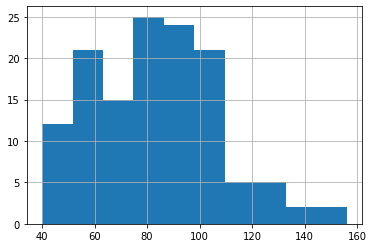

In [14]:
# plotar histograma
df.homicidio_doloso.hist();

### Qual a média de roubos por ano? 

A coluna `roubos_outros` representa o total de roubos que não estão relacionados com roubo de bancos, de carga e de veículos. Vamos plotar um gráfico de linha para visualização da média de casos por ano no Estado e descobrir em qual mês ocorre maior número de casos. 

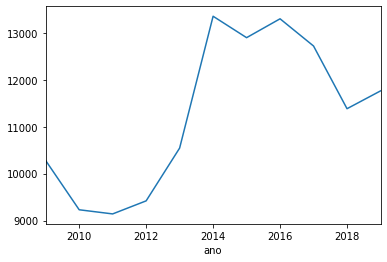

In [15]:
# plotar grafico de linha da coluna roubo_outros
df.groupby("ano")['roubo_outros'].mean().plot(kind='line');

Através do gráfico é possível observar que houve um aumento grande no número de roubos entre o ano de 2012 e 2014. Entre 2016 e 2019 houve uma queda. 

In [19]:
df.groupby("mes")['roubo_outros'].max().sort_values(ascending=False)

mes
Mar    14927
Mai    14716
Out    14146
Set    14025
Abr    13909
Ago    13869
Nov    13854
Jul    13689
Jan    13416
Jun    13185
Fev    13171
Dez    12832
Name: roubo_outros, dtype: int64

O mês de março foi o mês que mais ocorreu número de roubos e o mês de dezembro foi o menor.

# Conclusão

Foi feito uma análise resumida com base nos dados da Secretaria de Segurança pública do Estado de São Paulo. Existem diversas colunas e entradas mas selecionamos apenas algumas delas para realizarmos o estudo. 

Com base no estudo foi possível extrair diversas informações como a porcentagem dos veículos recuperados pela policia que é de 40%, o máximo de casos de homicidio doloso em um mês, o mês que mais houve casos de roubos e a variação de roubos por ano.

